<a href="https://colab.research.google.com/github/ajdillhoff/Linear-Algebra-Examples/blob/main/compute_affine_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computing Affine Transformations

One important result of solving linear systems is to compute a transformation between two different sets of points.

Given a set of points from the original coordinate system and another set of the same points transformed by $A$, how do we solve for that transformation matrix?

We are looking for some $A$ such that

$$
A \mathbf{x} = \hat{\mathbf{x}}.
$$

In a perfect world, $\hat{\mathbf{x}}$ will match the target points $\mathbf{y}$. In other words,

$$
\|\hat{\mathbf{x}} - \mathbf{y}\|_2 = 0.
$$

**For this problem, we will assume this is the case.**

For an affine transformation, we would have some matrix of the form

$$
A = \begin{bmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}
\end{bmatrix}.
$$

Given a homogeneous 2D coordinate $\mathbf{x}$, we can compute each component $A\mathbf{x}$ as

\begin{align*}
\hat{x}_1 &= a_{11} * x_1 + a_{12} * x_2 + a_{13} * 1\\
\hat{x}_2 &= a_{21} * x_1 + a_{22} * x_2 + a_{23} * 1\\
\end{align*}

We can fit this using a least squares approach by the following construction.

\begin{equation*}
\begin{bmatrix}
x_1^{(1)} & x_2^{(1)} & 1 & 0 & 0 & 0\\
0 & 0 & 0 & x_1^{(1)} & x_2^{(1)} & 1\\
&& \vdots\\
x_1^{(n)} & x_2^{(n)} & 1 & 0 & 0 & 0\\
0 & 0 & 0 & x_1^{(n)} & x_2^{(n)} & 1\\
\end{bmatrix}
\begin{bmatrix}
a_{11}\\
a_{12}\\
a_{13}\\
a_{21}\\
a_{22}\\
a_{23}\\
\end{bmatrix}=
\begin{bmatrix}
\hat{x}_1^{(1)}\\
\hat{x}_2^{(1)}\\
\vdots\\
\hat{x}_1^{(n)}\\
\hat{x}_2^{(n)}\\
\end{bmatrix}
\end{equation*}

We can solve this using the *normal equations*:

$$
A^T A \mathbf{x} = A^T \mathbf{b}.
$$


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def compute_affine_transform(src, dst):
    """Computes the affine transformation matrix `A` such that A @ src = dst."""
    num_samples = src.shape[0]
    
    # Convert to homogeneous coordinates
    src_affine = np.concatenate((src, np.ones((num_samples, 1))), axis=1)
    zero_buffer = np.zeros_like(src_affine)
    r1 = np.concatenate((src_affine, zero_buffer), axis=1)
    r2 = np.concatenate((zero_buffer, src_affine), axis=1)
    
    # Construct our design matrix X by interleaving the two equations required
    # for each point correspondence.
    X = np.empty((r1.shape[0] + r2.shape[0], r1.shape[1]), dtype=r1.dtype)
    X[0::2] = r1
    X[1::2] = r2
    
    # Flatten the target points into a vector (this is the b vector from above)
    y = dst.ravel()
    
    # TODO: Compute M by using the normal equations.
    # Here, M corresponds to the solution vector x from above.
    

    # Resahpe our solution vector (x in the equations above) into a 3x3
    # affine transformation matrix.
    M = np.reshape(M, (2, 3))
    M = np.vstack((M, np.zeros((1, M.shape[1]))))
    M[2, 2] = 1
    
    return M

Error = 8.102184729199735e-16


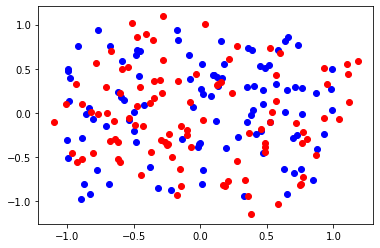

In [27]:
# Randomly sample a pattern and then transform it by some random rotation.
num_points = 100
x = np.random.rand(num_points, 2) * 2 - 1

# Create a random rotation matrix
theta = np.random.uniform(0, np.pi)
R = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])

y = R @ np.concatenate((x, np.ones((100, 1))), axis=1).T
y = y.T[:, :2]

# Call `compute_affine_transform` to estimate the rotation matrix
M = compute_affine_transform(x, y)

# Compute the norm between the true matrix and estimated matrix.
# This should be a very small number close to 0.
estimation_error = np.linalg.norm(R - M)
print(f"Error = {estimation_error}")

plt.scatter(x[:, 0], x[:, 1], c='b')
plt.scatter(y[:, 0], y[:, 1], c='r')